<a href="https://colab.research.google.com/github/Beta628427/CIS/blob/master/Clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal simple

In [0]:
import pandas as pd
import numpy as np
import gspread
import matplotlib.pyplot as plt
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza BETA
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Nueva sección

In [5]:
data1 = pd.read_csv('/content/drive/My Drive/CIS/DATASET/Salary_Data.csv',delimiter=',')
X = data1.iloc[:,:-1]
Y = data1.iloc[:,1]
Y = Y[:, np.newaxis]

print("X <Años de experiencia> = dimensiones -> " + str(X.shape))
print("Y       <Salario>       = dimensiones -> " + str(Y.shape))

X <Años de experiencia> = dimensiones -> (30, 1)
Y       <Salario>       = dimensiones -> (30, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/3, random_state=0)

# Escalado de variables
# en este ejemplo no es necesario lo dejaremos comentariado
#from sklearn.preprocessing import StandardScaler
#sc_x = StandardScaler()
#x_train = sc_x.fit.transform(x_train)
#x_test = sc_x.fit.transform(x_test)

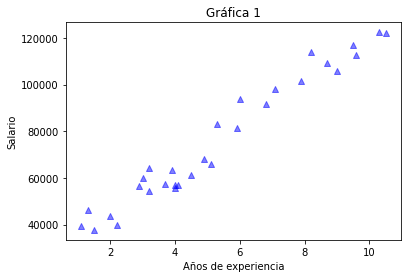

In [7]:
plt.scatter(X,Y,color='blue', marker='^',alpha=0.5)
plt.title("Gráfica 1")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.show()

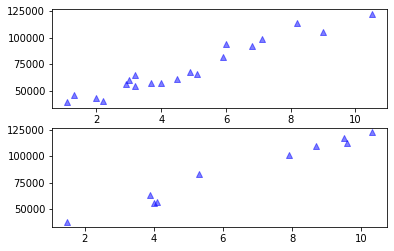

In [8]:
f, [ax1, ax2] = plt.subplots(2, 1, sharey=True) 
ax1.scatter(X_train,Y_train,color='blue', marker='^',alpha=0.5)
ax2.scatter(X_test, Y_test ,color='blue', marker='^',alpha=0.5)
plt.show()

### Modelo de regresión lineal simple. 
### método minimos cuadrados

In [9]:
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()
regresion.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predecir el conjunto de test

In [0]:
Y_pred= regresion.predict(X_test)

### Visualizar los resulados del entenamiento

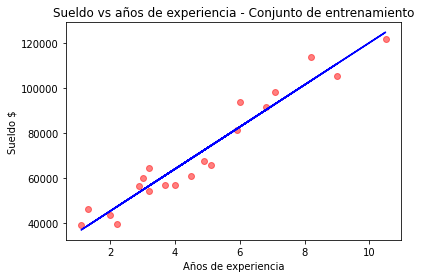

In [11]:
plt.scatter(X_train, Y_train, color="red",alpha=0.5)
plt.plot(X_train, regresion.predict(X_train), color="blue")
plt.title("Sueldo vs años de experiencia - Conjunto de entrenamiento")
plt.xlabel ("Años de experiencia")
plt.ylabel ("Sueldo $")
plt.show()

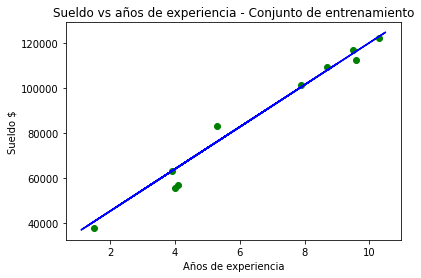

In [12]:
plt.scatter(X_test,Y_test,color="Green")
plt.plot(X_train, regresion.predict(X_train),color="blue")
plt.title("Sueldo vs años de experiencia - Conjunto de entrenamiento")
plt.xlabel ("Años de experiencia")
plt.ylabel ("Sueldo $")
plt.show()

# Tarea
## Regresion polinomica
### Investigar regresion polinomica con sklearn y hacer un ejemplo donde se aplique una regresion lineal y polinomica que se ajuste a la tenddencia de la nube de puntos y compare con error la diferencia entre el modelo linea y polinomico.